## Mining Polish Bankruptcy Data
<table><tr><td><img src='resources/img_0.jpg'></td><td><img src='resources/img_1.jpg'></td><td><img src='resources/img_2.jpg'></td></tr></table>

### Table of contents
#### A. Import libraries and data
#### B. Data preparation and exploration
&nbsp;&nbsp;&nbsp;&nbsp;(i) Define attributes and target variables <br>
&nbsp;&nbsp;&nbsp;&nbsp;(ii) Train test split <br>
&nbsp;&nbsp;&nbsp;&nbsp;(iii) Inspect missng values and data type of data <br>
&nbsp;&nbsp;&nbsp;&nbsp;(iv) Inspect distribution of target variable <br>
&nbsp;&nbsp;&nbsp;&nbsp;(v) Perform normalization (optional)
#### C. Data Modeling
- Single learners <br>
(i) Decision Tree Model <br>
(ii) Logistic Regression Model <br>
(iii) Gaussian Naive Bayes Model <br>
<br>
- Ensemble models <br>
(iv) Random Forest Model <br>
(v) Adaboost Classifier 

#### D. Model Evaluation
&nbsp;&nbsp;&nbsp;&nbsp;(i) Decision Tree Model <br>
&nbsp;&nbsp;&nbsp;&nbsp;(ii) Logistic Regression Model <br>
&nbsp;&nbsp;&nbsp;&nbsp;(iii) Gaussian Naive Bayes Model <br>
&nbsp;&nbsp;&nbsp;&nbsp;(iv) Random Forest Model <br>
&nbsp;&nbsp;&nbsp;&nbsp;(v) Adaboost Classifier

#### E. Model interpretation

#### F. Model comparison
&nbsp;&nbsp;&nbsp;&nbsp;(i) across models <br>
&nbsp;&nbsp;&nbsp;&nbsp;(ii) across timeframes
#### G. Cost and benefit analysis

<br>

### A. Import libraries and data

#### (i) libraries

In [1]:
# general utilities
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# for hyperparameters tuning and cross validation
from sklearn.model_selection import GridSearchCV

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# for displaying / plotting
from IPython.display import display
import matplotlib.pyplot as plt

#### (ii) data
- loading data from arff file<br>
Reference: https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419

In [2]:
# import data
years = [1,2,3,4,5]
raw_data = {} # dictionary of dataframe

for year in years:
    arr = arff.loadarff(f"data/year{year}.arff")
    raw_data[f"year{str(year)}"] = pd.DataFrame(arr[0])

In [3]:
# check that the data is correctly load
raw_data["year1"]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


#### (iii) renaming the target column
- Since the word "class" is a reserved keyword in python, better replace it by another word for easier manipulation later

In [4]:
for year in years:
    raw_data[f"year{year}"].rename(columns = {"class": "bankrupted"}, inplace = True)

### B. Data preparation and exploration

#### (i) Define attributes and target varialbles

In [5]:
features = []
for i in range(1,65):
    features.append(f"Attr{i}")

target = ["bankrupted"]

X = {}
Y = {}

for year in years:
    X[f"year{year}"] = raw_data[f"year{year}"][features]
    Y[f"year{year}"] = raw_data[f"year{year}"][target]

#### (ii) Train test split

In [6]:
X_train = {}
X_test = {}
Y_train = {}
Y_test = {}

for year in years:
    X_train[f"year{year}"], X_test[f"year{year}"], Y_train[f"year{year}"], Y_test[f"year{year}"] = train_test_split(X[f"year{year}"], Y[f"year{year}"], test_size=0.2, random_state=1)

In [7]:
# reset the indices for all dataframe
for year in years:
    X_train[f"year{year}"].reset_index(drop=True, inplace=True)
    X_test[f"year{year}"].reset_index(drop=True, inplace=True)
    Y_train[f"year{year}"].reset_index(drop=True, inplace=True)
    Y_test[f"year{year}"].reset_index(drop=True, inplace=True)

#### (iii) inspect missing values and data type of data
Using year 1 train data as an example: <br>
- we can observe that the problem of missing values is quite serious, e.g., for Attr37, there are only 3435 Non-Null values out of 5621 entries
- all attributes are in floating point data type, which is desirable
- however, the datatype of our target (class) is byte string, we need to convert it into binary number (int) - 0 or 1

In [8]:
X_train["year1"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   5619 non-null   float64
 1   Attr2   5619 non-null   float64
 2   Attr3   5619 non-null   float64
 3   Attr4   5595 non-null   float64
 4   Attr5   5613 non-null   float64
 5   Attr6   5619 non-null   float64
 6   Attr7   5619 non-null   float64
 7   Attr8   5600 non-null   float64
 8   Attr9   5621 non-null   float64
 9   Attr10  5619 non-null   float64
 10  Attr11  5594 non-null   float64
 11  Attr12  5595 non-null   float64
 12  Attr13  5621 non-null   float64
 13  Attr14  5619 non-null   float64
 14  Attr15  5619 non-null   float64
 15  Attr16  5600 non-null   float64
 16  Attr17  5600 non-null   float64
 17  Attr18  5619 non-null   float64
 18  Attr19  5621 non-null   float64
 19  Attr20  5621 non-null   float64
 20  Attr21  4327 non-null   float64
 21  Attr22  5619 non-null   float64
 22  

In [9]:
# fill the NaN values with corresponding column mean of the TRAIN SET for both train and test set

for year in years:
    mean_values = X_train[f"year{year}"].mean()
    X_train[f"year{year}"] = X_train[f"year{year}"].fillna(value=mean_values)
    X_test[f"year{year}"] = X_test[f"year{year}"].fillna(value=mean_values)

In [10]:
# double check all dataframes have zero missing values
for year in years:
    if (X_train[f"year{year}"].isna().sum().sum() == 0):
        print(f"year{year} train set contains mo missing values")
    if (X_test[f"year{year}"].isna().sum().sum() == 0):
        print(f"year{year} test set contains mo missing values")

year1 train set contains mo missing values
year1 test set contains mo missing values
year2 train set contains mo missing values
year2 test set contains mo missing values
year3 train set contains mo missing values
year3 test set contains mo missing values
year4 train set contains mo missing values
year4 test set contains mo missing values
year5 train set contains mo missing values
year5 test set contains mo missing values


For the target variable "class", we need to convert byte into binary variable (0 and 1)

In [11]:
type(Y_train["year1"].iloc[0][0])

bytes

In [12]:
int.from_bytes(Y_train["year1"].iloc[0][0], "big")

48

The view and copy properties of pandas is quite complicated. References for the following code to prevent SettingWithCopywarning:
- https://www.youtube.com/watch?v=4R4WsDJ-KVc
- https://towardsdatascience.com/3-solutions-for-the-setting-with-copy-warning-of-python-pandas-dfe15d62de08

In [13]:
# ASCII code for b'0' is 48
# ASCII code for b'1' is 49

# apply change of datatype on the "class" variable

for year in years:
    train_copy = Y_train[f"year{year}"].copy()
    test_copy = Y_test[f"year{year}"].copy()
    train_copy["bankrupted"] = Y_train[f"year{year}"].bankrupted.apply(lambda x: 0 if (int.from_bytes(x, "big") == 48)  else 1)
    test_copy["bankrupted"] = Y_test[f"year{year}"].bankrupted.apply(lambda x: 0 if (int.from_bytes(x, "big") == 48)  else 1)
    Y_train[f"year{year}"] = train_copy.copy()
    Y_test[f"year{year}"] = test_copy.copy()

#### (iv) inspect the distribution of the target variable
Reference: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

- from the graph plotting below, we can observe a seriosu class imbalance in our target variable, while our variable of interest (bankruptcy) is the minority group
- for such imbalanced dataset, evaluation metrics such as precision and recall should be emphasized over accuracy

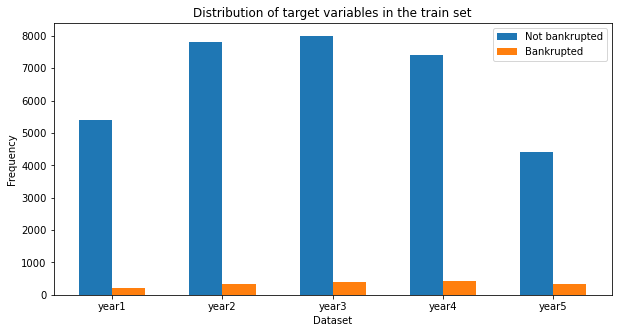

In [14]:
class_0 = []
class_1 = []
x_axis_label = []

for year in years:
    class_0.append(Y_train[f"year{year}"]["bankrupted"].value_counts()[0])
    class_1.append(Y_train[f"year{year}"]["bankrupted"].value_counts()[1])
    x_axis_label.append(f"year{year}")
    
# position of bars on x-axis
ind = np.arange(5)

# figure size
plt.figure(figsize=(10,5))

# width of bar
width = 0.3

# Plotting
plt.bar(ind, class_0 , width, label="Not bankrupted")
plt.bar(ind + width, class_1, width, label="Bankrupted")
        
plt.xlabel("Dataset")
plt.ylabel("Frequency")
plt.title("Distribution of target variables in the train set")

plt.xticks(ind + width / 2, x_axis_label)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### (v) perform normalization (optional)
- standardization may help the convergence of logistic regression if we perform regularization
- however, normalization generally has little effect on Decision Tree Model and Naive Bayes Model
- here we use the train set to create the scaler for both train set and test set, since we assume the train set is representable enough

In [15]:
# create scalers for each year's dataset

# a dictionary of scalers
# z_score_scaler = {}

# for year in years:
#     z_score_scaler[f"year{year}"] = preprocessing.StandardScaler().fit(X_train[f"year{year}"])

In [16]:
# apply the scalers to each dataset

# for year in years:
#     X_train[f"year{year}"] = z_score_scaler[f"year{year}"].transform(X_train[f"year{year}"])
#     X_test[f"year{year}"] = z_score_scaler[f"year{year}"].transform(X_test[f"year{year}"])

### C. Data modeling

We are performing a classification task, and our team will try out the following models:
- Single learners <br>
(i) Decision Tree Model <br>
(ii) Logistic Regression Model <br>
(iii) Gaussian Naive Bayes Model <br>
<br>
- Ensemble models <br>
(iv) Random Forest Model <br>
(v) Adaboost Classifier <br>

For grid search, set the n_jobs parameter to be -1 to enable parallel processing, lowering the running time

Since the data is highly imbalanced, all the models below will give higher class weights to class 1 <br>
Reference: https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

In [17]:
weights = {0: 1/11, 1: 10/11} # class 0 : class 1 = 1 : 10

#### (i) Decision Tree Model

The following hyper-paramter will be used in the decision tree model:
- max_depth

In [18]:
depths = np.arange(10, 31)

In [19]:
# define a grid of decision tree hyperparameters
decsion_tree_try_grid = [{"max_depth":depths}]

In [20]:
# dictionary of decision tree models for grid search CV
DTM = {}

for year in years:
    DTM[f"year{year}"] = GridSearchCV(DecisionTreeClassifier(criterion="entropy",class_weight=weights), param_grid=decsion_tree_try_grid, cv=10, n_jobs=-1)

In [21]:
# fit the training set
for year in years:
    DTM[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"])
    print(f"Finished fitting year{year}'s data")

Finished fitting year1's data
Finished fitting year2's data
Finished fitting year3's data
Finished fitting year4's data
Finished fitting year5's data


The following table summaries the "best" hyper-parameters and accruacy score for each year

In [22]:
max_depth = []
best_score = []

for year in years:
    max_depth.append(DTM[f"year{year}"].best_params_["max_depth"])
    best_score.append(DTM[f"year{year}"].best_score_)

In [23]:
d = {"year":years, "max_depth":max_depth, "best_score":best_score}
pd.DataFrame(data=d, index=None)

,year,max_depth,best_score
0,1,30,0.969578
1,2,26,0.955518
2,3,28,0.947274
3,4,28,0.937189
4,5,25,0.933372


In [24]:
# train the final decision tree models according to the best parameters
DTM_final = {}

for year in years:
    DTM_final[f"year{year}"] = DecisionTreeClassifier(criterion="entropy",
                                                      class_weight=weights,
                                                      max_depth = DTM[f"year{year}"].best_params_["max_depth"])
    
    DTM_final[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"])

#### (ii) Logistic Regression Model
The following hyper-parameters will be used in the logistic tree model
- regularization strength (C)
- regularization method (lasso, ridge) <br>

Reference: https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression/notebook<br>

Some points to note:
- since the dataset is relative large, need to increase the number of iterations for the regularization to increase the probability of converge (since the default value of the max_iter parameter is 100 only)
- use saga solver to increase the training speed, since liblinear solver is extremely slow for relatively large data sets
- since sever convergence warning is observed, the warning is disabled to result a cleaner workbook

In [25]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [26]:
strengths = np.logspace(-3,1,5)
methods = ["l1","l2"]

In [27]:
logistic_regression_try_grid = {"C":strengths,"penalty":methods}

In [28]:
# dictionary of logistic regression models for grid search CV
LRM = {}

for year in years:
    LRM[f"year{year}"] = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000, class_weight=weights), param_grid=logistic_regression_try_grid, cv=10, n_jobs=-1)

In [29]:
# fit the training set

for year in years:
    LRM[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"].values.ravel())
    print(f"Finished fitting year{year}'s data")

Finished fitting year1's data
Finished fitting year2's data
Finished fitting year3's data
Finished fitting year4's data
Finished fitting year5's data


In [30]:
strength_list = []
method_list = []
best_score = []

for year in years:
    strength_list.append(LRM[f"year{year}"].best_params_["C"])
    method_list.append(LRM[f"year{year}"].best_params_["penalty"])
    best_score.append(LRM[f"year{year}"].best_score_)

In [31]:
d = {"year":years, "strength":strength_list, "method":method_list, "best_score":best_score}
pd.DataFrame(data=d, index=None)

,year,strength,method,best_score
0,1,10.000,l2,0.783662
1,2,0.010,l1,0.709015
2,3,0.001,l2,0.766490
3,4,0.001,l1,0.786162
4,5,0.001,l2,0.766934


In [32]:
LRM_final = {}

for year in years:
    LRM_final[f"year{year}"] = LogisticRegression(penalty=LRM[f"year{year}"].best_params_["penalty"],
                                                  C=LRM[f"year{year}"].best_params_["C"],
                                                  solver="saga",
                                                  class_weight=weights)
    
    LRM_final[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"].values.ravel())

#### (iii) Gaussian Naive Bayes Model (problematic)

There is no general hyper-parameters for Naive Bayes Model

In [33]:
GNBM_final = {}

for year in years:
    GNBM_final[f"year{year}"] = GaussianNB()
    GNBM_final[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"].values.ravel())

#### (iv) Random Forest Model
The following hyper-parameter will be used in the Random Forest model:
- n_estimators (number of trees in the forest)

In [34]:
no_estimators = np.arange(2, 20)

In [35]:
random_forest_try_grid = {"n_estimators":no_estimators}

In [36]:
# dictionary of random forest models for grid search CV
RFM = {}

for year in years:
    RFM[f"year{year}"] = GridSearchCV(RandomForestClassifier(criterion="entropy", class_weight=weights), param_grid=random_forest_try_grid, cv=10, n_jobs=-1)

In [37]:
# fit the training set
for year in years:
    RFM[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"].values.ravel())
    print(f"Finished fitting year{year}'s data")

Finished fitting year1's data
Finished fitting year2's data
Finished fitting year3's data
Finished fitting year4's data
Finished fitting year5's data


The following table summaries the "best" hyper-parameters and accruacy score for each year

In [38]:
no_of_estimators = []
best_score = []

for year in years:
    no_of_estimators.append(RFM[f"year{year}"].best_params_["n_estimators"])
    best_score.append(RFM[f"year{year}"].best_score_)

In [39]:
d = {"year":years, "no_of_estimators":no_of_estimators, "best_score":best_score}
pd.DataFrame(data=d, index=None)

,year,no_of_estimators,best_score
0,1,13,0.972425
1,2,13,0.966945
2,3,17,0.959296
3,4,15,0.952637
4,5,10,0.941837


In [40]:
RFM_final = {}

for year in years:
    RFM_final[f"year{year}"] = RandomForestClassifier(criterion="entropy",
                                                      class_weight=weights,
                                                      n_estimators=RFM[f"year{year}"].best_params_["n_estimators"])
    
    RFM_final[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"].values.ravel())

#### (v) Adaboost Classifier
The following hyper-parameter will be used in the Adaboost Classifier
- n_estimators (number of rounds of boosting)

In [41]:
no_estimators = np.arange(100,201,10)

In [42]:
adaboost_try_grid = {"n_estimators":no_estimators}

In [43]:
# dictionary of ada boost classifiers for grid search CV
AB = {}

for year in years:
    AB[f"year{year}"] = GridSearchCV(AdaBoostClassifier(), param_grid=adaboost_try_grid, cv=10, n_jobs=-1)

In [44]:
# fit the training set

for year in years:
    AB[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"].values.ravel())
    print(f"Finished fitting year{year}'s data")

Finished fitting year1's data
Finished fitting year2's data
Finished fitting year3's data
Finished fitting year4's data
Finished fitting year5's data


In [45]:
no_of_estimators = []
best_score = []

for year in years:
    no_of_estimators.append(AB[f"year{year}"].best_params_["n_estimators"])
    best_score.append(AB[f"year{year}"].best_score_)

In [46]:
d = {"year":years, "no_of_estimators":no_of_estimators, "best_score":best_score}
pd.DataFrame(data=d, index=None)

,year,no_of_estimators,best_score
0,1,200,0.976872
1,2,120,0.965717
2,3,200,0.956914
3,4,200,0.953273
4,5,130,0.949448


In [47]:
AB_final = {}

for year in years:
    AB_final[f"year{year}"] = AdaBoostClassifier(n_estimators=AB[f"year{year}"].best_params_["n_estimators"])
    
    AB_final[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"].values.ravel())

### D. Model evaluation

#### (i) Decision Tree Model

#### Accruacy

In [48]:
# carry out the prediction on the test set
DTM_prediction = {}

for year in years:
    DTM_prediction[f"year{year}"] = DTM_final[f"year{year}"].predict(X_test[f"year{year}"])

In [49]:
# accuracy scores
DTM_accuracy = [] # list of accuracy scores

for year in years:
    
    DTM_accuracy.append(accuracy_score(Y_test[f"year{year}"], DTM_prediction[f"year{year}"], normalize=True, sample_weight=None))
    
d = {"year":years, "accuracy":DTM_accuracy}
pd.DataFrame(data=d, index=None)

,year,accuracy
0,1,0.957326
1,2,0.953808
2,3,0.940029
3,4,0.945380
4,5,0.946701


#### Confusion matrix, precision and recall

Note that the representation of confusion matrix in Python is different from that represented in the lecture <br>
Reference:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
The confusion matrix in Python is represented in the following way: <br>
| TN | FP | <br>
| FN | TP |

In [50]:
# confusion matrix
for year in years:
    print(f"Confusion Matrix for year{year}\n", confusion_matrix(Y_test[f"year{year}"], DTM_prediction[f"year{year}"]))
    print("")

Confusion Matrix for year1
 [[1315   29]
 [  31   31]]

Confusion Matrix for year2
 [[1902   56]
 [  38   39]]

Confusion Matrix for year3
 [[1943   66]
 [  60   32]]

Confusion Matrix for year4
 [[1810   51]
 [  56   42]]

Confusion Matrix for year5
 [[1063   33]
 [  30   56]]



In [51]:
# precision and recall from classification report
DTM_precision = []
DTM_recall = []

for year in years:
    precision = classification_report(Y_test[f"year{year}"], DTM_prediction[f"year{year}"], output_dict=True)["1"]["precision"]
    recall = classification_report(Y_test[f"year{year}"], DTM_prediction[f"year{year}"], output_dict=True)["1"]["recall"]
    DTM_precision.append(precision)
    DTM_recall.append(recall)

d = {"year":years, "precision":DTM_precision, "recall":DTM_recall}
pd.DataFrame(data=d, index=None)

,year,precision,recall
0,1,0.516667,0.500000
1,2,0.410526,0.506494
2,3,0.326531,0.347826
3,4,0.451613,0.428571
4,5,0.629213,0.651163


#### AUC

In [52]:
# first, obtain the probabilities from the model
DTM_proba = {}

for year in years:
    DTM_proba[f"year{year}"] = DTM_final[f"year{year}"].predict_proba(X_test[f"year{year}"])
    DTM_proba[f"year{year}"] = DTM_proba[f"year{year}"][:,1] # slice the 2-d array to only obtain the portion of class 1

In [53]:
DTM_AUC = []

for year in years:
    AUC = roc_auc_score(Y_test[f"year{year}"], DTM_proba[f"year{year}"])
    DTM_AUC.append(AUC)

d = {"year":years, "AUC":DTM_AUC}
pd.DataFrame(data=d, index=None)

,year,AUC
0,1,0.739211
1,2,0.738946
2,3,0.657487
3,4,0.700789
4,5,0.810352


#### (ii) Logistic Regression Model

#### Accuracy

In [54]:
# carry out the prediction on the test set
LRM_prediction = {}

for year in years:
    LRM_prediction[f"year{year}"] = LRM_final[f"year{year}"].predict(X_test[f"year{year}"])

In [55]:
# accuracy scores
LRM_accuracy = [] # list of accuracy scores

for year in years:
    
    LRM_accuracy.append(accuracy_score(Y_test[f"year{year}"], LRM_prediction[f"year{year}"], normalize=True, sample_weight=None))
    
d = {"year":years, "accuracy":LRM_accuracy}
pd.DataFrame(data=d, index=None)

,year,accuracy
0,1,0.792319
1,2,0.685504
2,3,0.783912
3,4,0.809086
4,5,0.752115


#### Confusion matrix, precision and recall

In [56]:
# confusion matrix
for year in years:
    print(f"Confusion Matrix for year{year}\n", confusion_matrix(Y_test[f"year{year}"], LRM_prediction[f"year{year}"]))
    print("")

Confusion Matrix for year1
 [[1100  244]
 [  48   14]]

Confusion Matrix for year2
 [[1361  597]
 [  43   34]]

Confusion Matrix for year3
 [[1616  393]
 [  61   31]]

Confusion Matrix for year4
 [[1543  318]
 [  56   42]]

Confusion Matrix for year5
 [[837 259]
 [ 34  52]]



In [57]:
# precision and recall from classification report
LRM_precision = []
LRM_recall = []

for year in years:
    precision = classification_report(Y_test[f"year{year}"], LRM_prediction[f"year{year}"], output_dict=True)["1"]["precision"]
    recall = classification_report(Y_test[f"year{year}"], LRM_prediction[f"year{year}"], output_dict=True)["1"]["recall"]
    LRM_precision.append(precision)
    LRM_recall.append(recall)

d = {"year":years, "precision":LRM_precision, "recall":LRM_recall}
pd.DataFrame(data=d, index=None)

,year,precision,recall
0,1,0.054264,0.225806
1,2,0.053883,0.441558
2,3,0.073113,0.336957
3,4,0.116667,0.428571
4,5,0.167203,0.604651


#### AUC

In [58]:
# first, obtain the probabilities from the model
LRM_proba = {}

for year in years:
    LRM_proba[f"year{year}"] = LRM_final[f"year{year}"].predict_proba(X_test[f"year{year}"])
    LRM_proba[f"year{year}"] = LRM_proba[f"year{year}"][:,1] # slice the 2-d array to only obtain the portion of class 1

In [59]:
LRM_AUC = []

for year in years:
    AUC = roc_auc_score(Y_test[f"year{year}"], LRM_proba[f"year{year}"])
    LRM_AUC.append(AUC)

d = {"year":years, "AUC":LRM_AUC}
pd.DataFrame(data=d, index=None)

,year,AUC
0,1,0.587246
1,2,0.577086
2,3,0.572267
3,4,0.663512
4,5,0.768036


#### (iii) Gaussian Naive Bayes Model (problematic)

#### Accuracy

In [60]:
# carry out the prediction on the test set
GNBM_prediction = {}

for year in years:
    GNBM_prediction[f"year{year}"] = GNBM_final[f"year{year}"].predict(X_test[f"year{year}"])

In [61]:
# accuracy scores
GNBM_accuracy = [] # list of accuracy scores

for year in years:
    
    GNBM_accuracy.append(accuracy_score(Y_test[f"year{year}"], GNBM_prediction[f"year{year}"], normalize=True, sample_weight=None))
    
d = {"year":years, "accuracy":GNBM_accuracy}
pd.DataFrame(data=d, index=None)

,year,accuracy
0,1,0.074680
1,2,0.072236
2,3,0.085673
3,4,0.088310
4,5,0.124365


#### Confusion matrix

In [62]:
# confusion matrix
for year in years:
    print(f"Confusion Matrix for year{year}\n", confusion_matrix(Y_test[f"year{year}"], GNBM_prediction[f"year{year}"]))
    print("")

Confusion Matrix for year1
 [[  47 1297]
 [   4   58]]

Confusion Matrix for year2
 [[  72 1886]
 [   2   75]]

Confusion Matrix for year3
 [[  91 1918]
 [   3   89]]

Confusion Matrix for year4
 [[  78 1783]
 [   3   95]]

Confusion Matrix for year5
 [[  65 1031]
 [   4   82]]



Continuing the evalution of the Naive Bayes Model is probably not meaningful, since the model seems to have:
- very low accuracy
- unexpectedly high false positive rate (FPR)

#### (iv) Random Forest Model

#### Accuracy

In [63]:
# carry out the prediction on the test set
RFM_prediction = {}

for year in years:
    RFM_prediction[f"year{year}"] = RFM_final[f"year{year}"].predict(X_test[f"year{year}"])

In [64]:
# accuracy scores
RFM_accuracy = [] # list of accuracy scores

for year in years:
    
    RFM_accuracy.append(accuracy_score(Y_test[f"year{year}"], RFM_prediction[f"year{year}"], normalize=True, sample_weight=None))
    
d = {"year":years, "accuracy":RFM_accuracy}
pd.DataFrame(data=d, index=None)

,year,accuracy
0,1,0.965149
1,2,0.968059
2,3,0.956211
3,4,0.956100
4,5,0.945008


#### Confusion matrix, precision and recall

In [65]:
# confusion matrix
for year in years:
    print(f"Confusion Matrix for year{year}\n", confusion_matrix(Y_test[f"year{year}"], RFM_prediction[f"year{year}"]))
    print("")

Confusion Matrix for year1
 [[1341    3]
 [  46   16]]

Confusion Matrix for year2
 [[1956    2]
 [  63   14]]

Confusion Matrix for year3
 [[2002    7]
 [  85    7]]

Confusion Matrix for year4
 [[1860    1]
 [  85   13]]

Confusion Matrix for year5
 [[1093    3]
 [  62   24]]



In [66]:
# precision and recall from classification report
RFM_precision = []
RFM_recall = []

for year in years:
    precision = classification_report(Y_test[f"year{year}"], RFM_prediction[f"year{year}"], output_dict=True)["1"]["precision"]
    recall = classification_report(Y_test[f"year{year}"], RFM_prediction[f"year{year}"], output_dict=True)["1"]["recall"]
    RFM_precision.append(precision)
    RFM_recall.append(recall)

d = {"year":years, "precision":RFM_precision, "recall":RFM_recall}
pd.DataFrame(data=d, index=None)

,year,precision,recall
0,1,0.842105,0.258065
1,2,0.875000,0.181818
2,3,0.500000,0.076087
3,4,0.928571,0.132653
4,5,0.888889,0.279070


#### AUC

In [67]:
# first, obtain the probabilities from the model
RFM_proba = {}

for year in years:
    RFM_proba[f"year{year}"] = RFM_final[f"year{year}"].predict_proba(X_test[f"year{year}"])
    RFM_proba[f"year{year}"] = RFM_proba[f"year{year}"][:,1] # slice the 2-d array to only obtain the portion of class 1

In [68]:
RFM_AUC = []

for year in years:
    AUC = roc_auc_score(Y_test[f"year{year}"], RFM_proba[f"year{year}"])
    RFM_AUC.append(AUC)

d = {"year":years, "AUC":RFM_AUC}
pd.DataFrame(data=d, index=None)

,year,AUC
0,1,0.824417
1,2,0.808309
2,3,0.777425
3,4,0.877784
4,5,0.883005


#### (v) Adaboost Classifier

#### Accuracy

In [69]:
# carry out the prediction on the test set
AB_prediction = {}

for year in years:
    AB_prediction[f"year{year}"] = AB_final[f"year{year}"].predict(X_test[f"year{year}"])

In [70]:
# accuracy scores
AB_accuracy = [] # list of accuracy scores

for year in years:
    
    AB_accuracy.append(accuracy_score(Y_test[f"year{year}"], AB_prediction[f"year{year}"], normalize=True, sample_weight=None))
    
d = {"year":years, "accuracy":AB_accuracy}
pd.DataFrame(data=d, index=None)

,year,accuracy
0,1,0.972262
1,2,0.962654
2,3,0.958115
3,4,0.959673
4,5,0.958545


#### Confusion matrix, precision and recall

In [71]:
# confusion matrix
for year in years:
    print(f"Confusion Matrix for year{year}\n", confusion_matrix(Y_test[f"year{year}"], AB_prediction[f"year{year}"]))
    print("")

Confusion Matrix for year1
 [[1334   10]
 [  29   33]]

Confusion Matrix for year2
 [[1943   15]
 [  61   16]]

Confusion Matrix for year3
 [[1992   17]
 [  71   21]]

Confusion Matrix for year4
 [[1847   14]
 [  65   33]]

Confusion Matrix for year5
 [[1084   12]
 [  37   49]]



In [72]:
# precision and recall from classification report
AB_precision = []
AB_recall = []

for year in years:
    precision = classification_report(Y_test[f"year{year}"], AB_prediction[f"year{year}"], output_dict=True)["1"]["precision"]
    recall = classification_report(Y_test[f"year{year}"], AB_prediction[f"year{year}"], output_dict=True)["1"]["recall"]
    AB_precision.append(precision)
    AB_recall.append(recall)

d = {"year":years, "precision":AB_precision, "recall":AB_recall}
pd.DataFrame(data=d, index=None)

,year,precision,recall
0,1,0.767442,0.532258
1,2,0.516129,0.207792
2,3,0.552632,0.228261
3,4,0.702128,0.336735
4,5,0.803279,0.569767


#### AUC

In [73]:
# first, obtain the probabilities from the model
AB_proba = {}

for year in years:
    AB_proba[f"year{year}"] = AB_final[f"year{year}"].predict_proba(X_test[f"year{year}"])
    AB_proba[f"year{year}"] = AB_proba[f"year{year}"][:,1] # slice the 2-d array to only obtain the portion of class 1

In [74]:
AB_AUC = []

for year in years:
    AUC = roc_auc_score(Y_test[f"year{year}"], AB_proba[f"year{year}"])
    AB_AUC.append(AUC)

d = {"year":years, "AUC":AB_AUC}
pd.DataFrame(data=d, index=None)

,year,AUC
0,1,0.872408
1,2,0.843174
2,3,0.856553
3,4,0.870171
4,5,0.944237


### E. Model interpretation

#### (i) Decision Tree
- the model performance is satisfatory
- accuracy higher than 90% for all 5 years (although this metric is not the main focus)
- precision higher than 50%, recall around 50% for all 5 years, much larger than the majority classifier ("Naive learner", 0 precision and 0 recall)

The root node of the decision tree can be interpreted as the "most informative attribute" for classification since we use entropy as the split criteria. <br>
The tree of year 1's model is visualized below:

In [75]:
from sklearn import tree

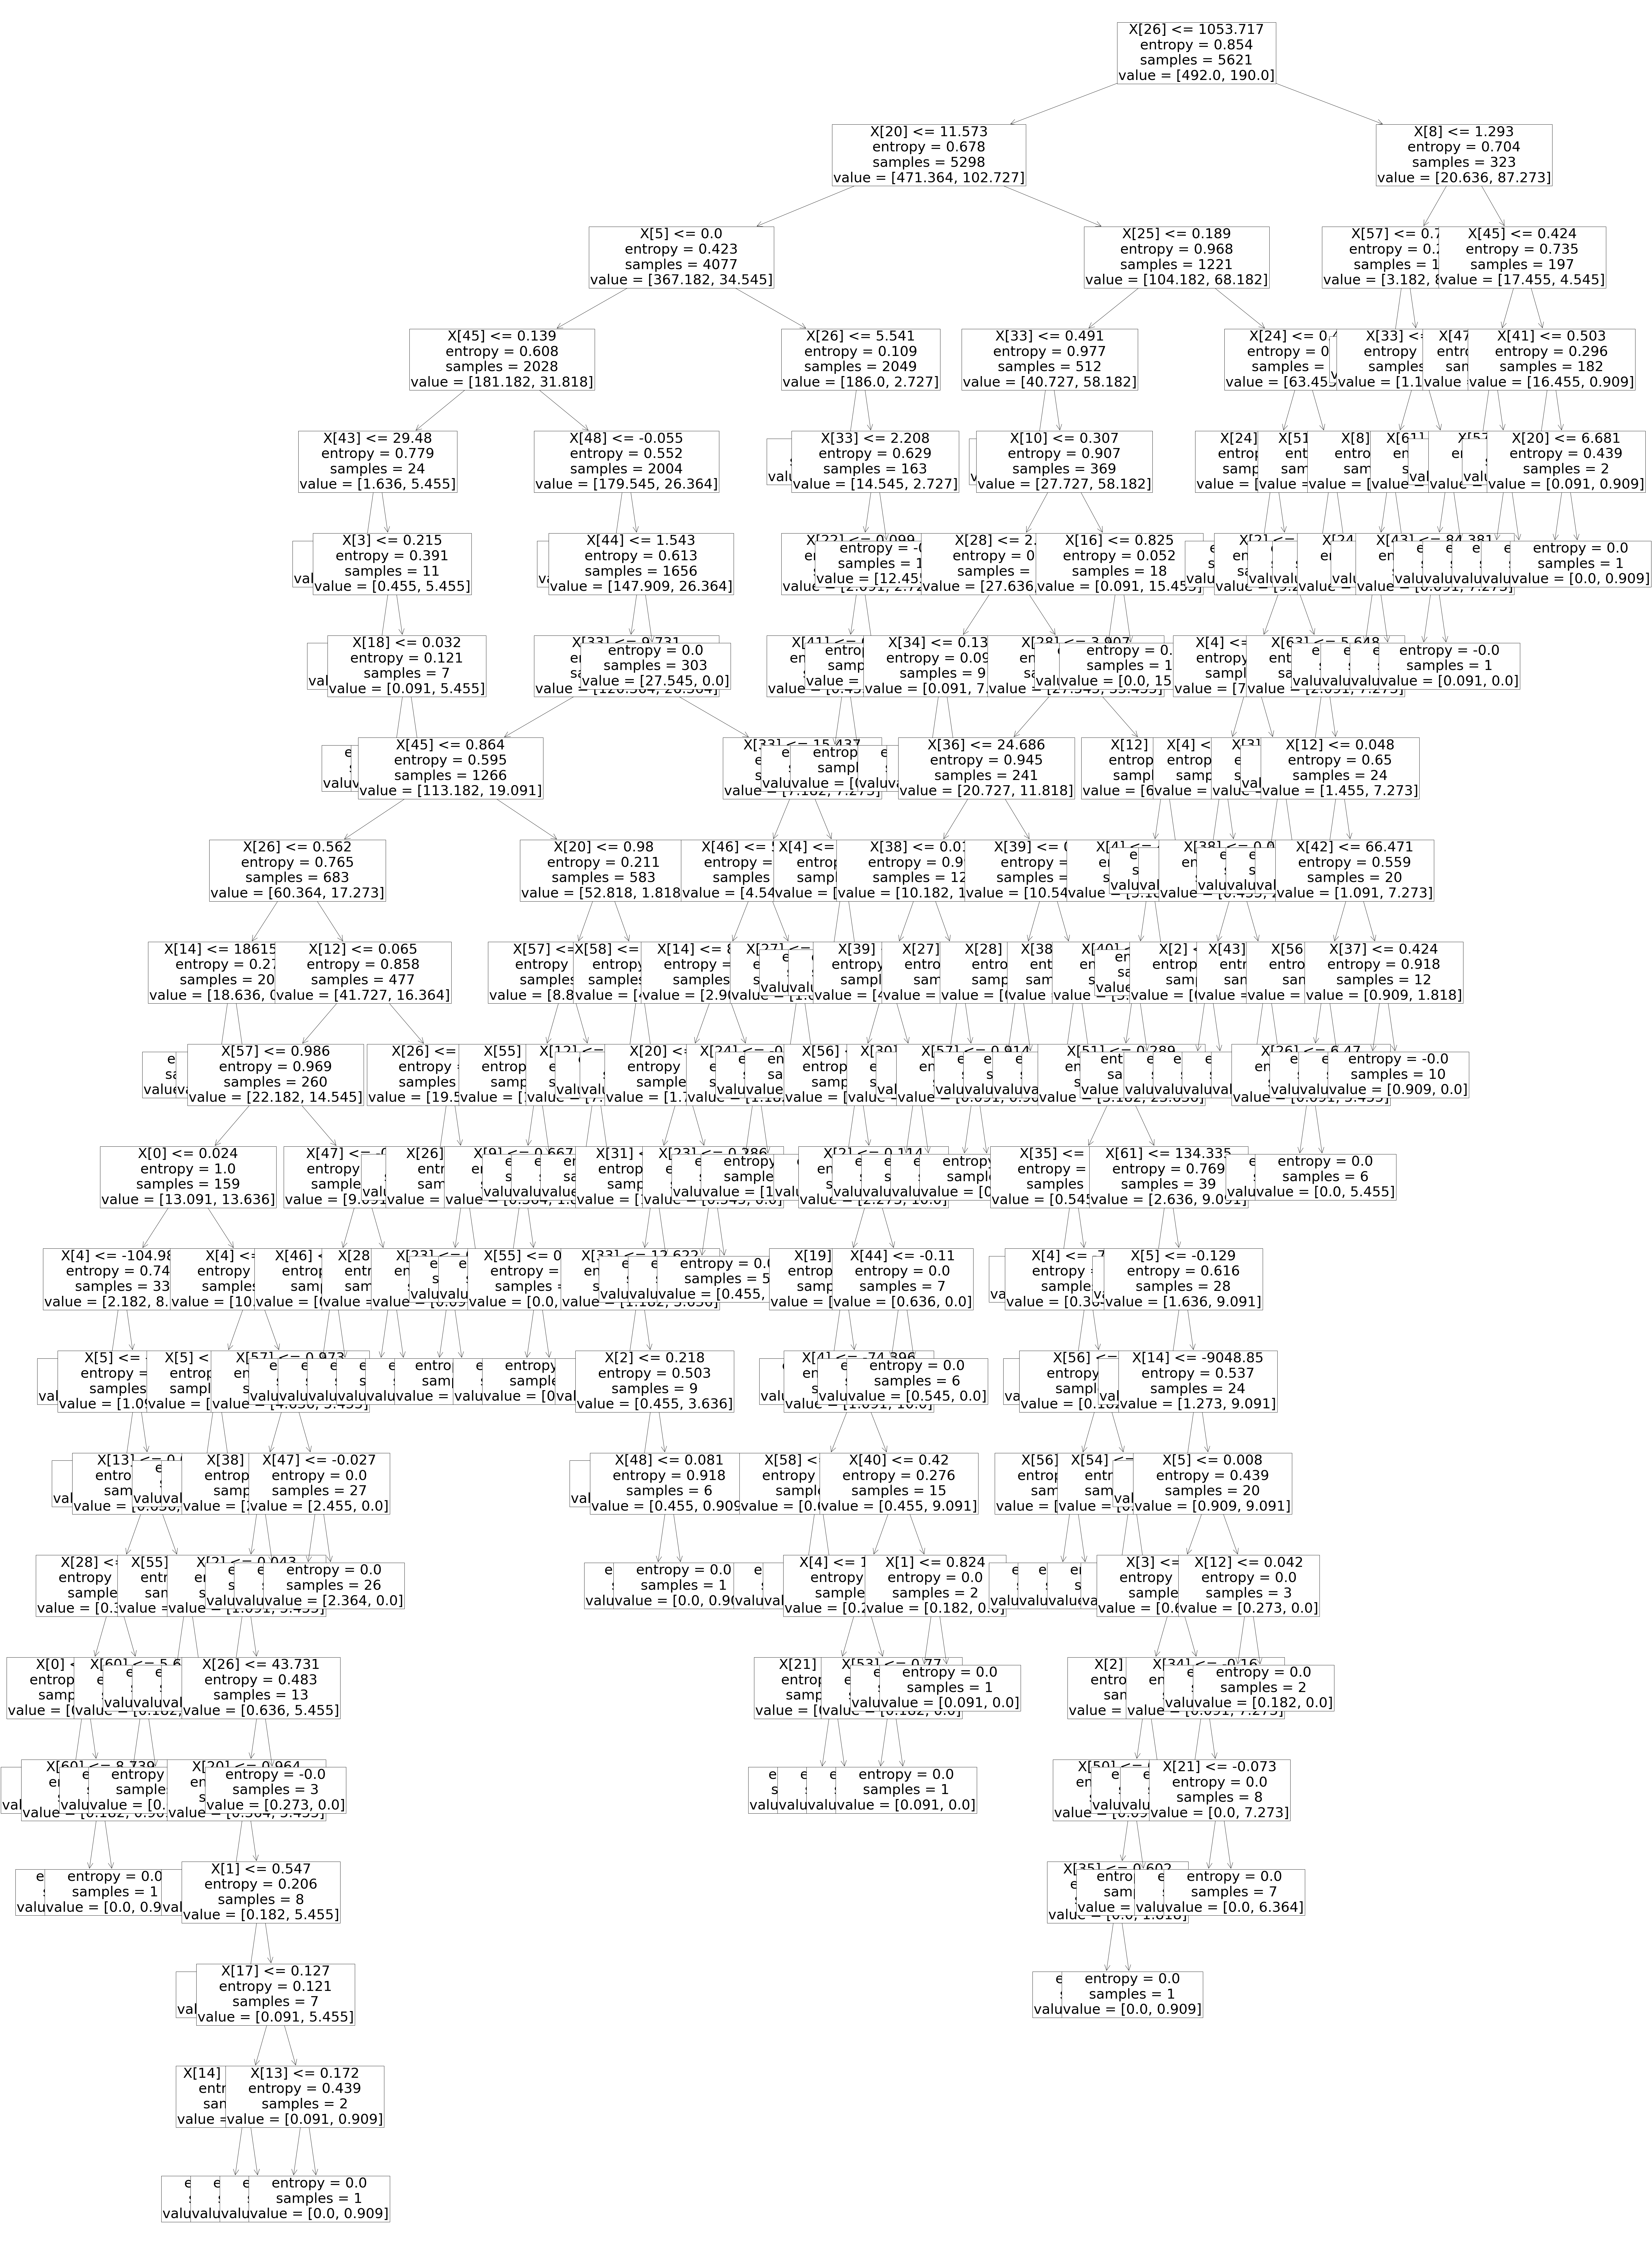

In [76]:
plt.figure(figsize = (100,150))
tree.plot_tree(DTM_final["year1"],ax=None, fontsize=50)
plt.show()

To keep the notebook more clean, the model of year2 to year 5 will not be plotted. Instead, we can access the root node by accessing the underlying tree_ object of decision tree classfier. <br>
Nodes in the tree are ordered in the depth first search order. <br>
Reference: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [77]:
root_node = []

for year in years:
    root_node.append(DTM_final[f"year{year}"].tree_.feature[0])

In [78]:
# note that features are indexed 0
d = {"year":years, "feature_index":root_node}
pd.DataFrame(data=d, index=None)

,year,feature_index
0,1,26
1,2,26
2,3,25
3,4,23
4,5,34


There is a repeated attribute from the root nodes of different timeframes:
- feature[26]: profit on operating activities / financial expenses

#### (ii) Logistic Regression Model
- the performance of the Logistic Regression Model is significantly worse than the Decision Tree Model
- accruacy around 70%-80%, precision around 10%, recall mostly < 50% for all the 5 years
- the underlying reason may be due to the linearity of the logistic regression model, since the boundary of logistic regression model is linear, but a linear boundary may not be able to capture the majority of pattern in data sets

Although the performance of the Logistic Regression Model is not as good as the Decision Tree Model, we can still interpret the coefficients of the resulting model to make sense out of it. <br>
We can interpret the coefficients of the resulting models to find out which feature(s) have significant effect on prediction

In [79]:
d = {}

for year in years:
    d[f"year{year}"] = LRM_final[f"year{year}"].coef_[0]
    
pd.DataFrame.from_dict(d)

,year1,year2,year3,year4,year5
0,-1.530296e-12,0.000000e+00,-3.246095e-11,0.000000e+00,-4.866420e-10
1,-5.426312e-12,8.724044e-12,2.014503e-10,0.000000e+00,1.074420e-09
2,-4.121562e-12,-9.850328e-11,-3.693274e-10,0.000000e+00,-9.762895e-10
3,-4.049138e-11,-5.045003e-10,-4.637380e-09,-2.619724e-09,-2.606478e-09
4,6.775473e-09,-1.677010e-08,3.047223e-07,7.058824e-09,-6.015373e-07
...,...,...,...,...,...
59,-1.136781e-08,-7.423103e-08,-2.765281e-07,-6.308102e-08,5.006921e-08
60,-2.698374e-10,-2.415913e-09,-4.294433e-09,-7.419906e-09,1.063984e-09
61,-3.415059e-08,2.083669e-07,2.346247e-07,-3.139287e-07,4.522172e-07
62,-1.248686e-10,-1.726134e-09,-2.334836e-09,-1.001928e-09,3.119438e-09


Find the maximum and minimum coefficients from each year

In [151]:
# max
max = []
index = []

for year in years:
    max.append(LRM_final[f"year{year}"].coef_[0].max())
    index.append(np.argmax(LRM_final[f"year{year}"].coef_[0]))

In [152]:
d = {"year":years, "max_coefficient":max, "feature_index":index}
pd.DataFrame(data=d)

,year,max_coefficient,feature_index
0,1,6.775473e-09,4
1,2,2.147609e-07,14
2,3,3.047223e-07,4
3,4,7.058824e-09,4
4,5,1.619555e-06,31


In [153]:
# min
min = []
index = []

for year in years:
    min.append(LRM_final[f"year{year}"].coef_[0].min())
    index.append(np.argmin(LRM_final[f"year{year}"].coef_[0]))

In [154]:
d = {"year":years, "min_coefficient":min, "feature_index":index}
pd.DataFrame(data=d)

,year,min_coefficient,feature_index
0,1,-2.069427e-07,54
1,2,-1.044680e-06,54
2,3,-2.270608e-06,54
3,4,-2.818960e-06,54
4,5,-9.064982e-06,54


#### (iii) Gaussian Naive Bayes Model
- the performance of the Gaussian Naive Bayes Model is extremely poor, no matter in terms of accuracy, precision, recall or AUC
- the imbalance property in the data set may be one of the reason contributing to such a poor performance
- another possible reason for such a poor performance is the violation of the "Naive" assumption: all features are conditionally independent. The conditional independent assumption is obviously not true for different financial metrics, since financial metrics are usually corrleated with one another

#### (iv) Random Forest Model
- the performance of Random Forest Model is fair
- although it has a high accuracy, its recall is significantly lower than the single learner Decision Tree Model
- such a surprising result may be due to the imbalance nature of the data set, since random forest model is probably not suited to classification problems with a skewed class distribution

#### (v) Adaboost Classifier
- the performance of Adaboost Classifier is satisfatory
- accuracy higher than 95%, precision of all 5 years higher than 50%, recall of 2 out of 5 years higher than 50%
- the satisfactory performance is probably a result of the power of ensemble learning, since the weak learners probably generate prediction errors that are un-correlated, which are then smoothed out by combining all the weak learners.

### F. Model comparison

(i) across models
- Since the data set is highly imbalanced, it is better for us to focus on precision and recall metrics 
- As discussed in part E, <br>
(i) Decision Tree Model <br>
(ii) Adaboost Classifier <br>
perform relatively better among all the models

(ii) across timeframes
- We can further analysis the performance of models on different timeframes
- Further investigation will be carried out on the models with better performance (Decision Tree Model and Adaboost Classifier) <br>
Style reference: https://softhints.com/display-two-pandas-dataframes-side-by-side-jupyter-notebook/

In [86]:
from IPython.display import display_html 

In [87]:
# recall the precision and recall metrics in all timeframes for the two models
DTM_d = {"year":years, "precision":DTM_precision, "recall":DTM_recall}
DTM_df = pd.DataFrame(data=DTM_d, index=None)

AB_d = {"year":years, "precision":AB_precision, "recall":AB_recall}
AB_df = pd.DataFrame(data=AB_d, index=None)

In [88]:
DTM_styler = DTM_df.style.set_table_attributes("style='display:inline'").set_caption('Decision Tree Model')
AB_styler = AB_df.style.set_table_attributes("style='display:inline'").set_caption('Adaboost Classifier')

space = "\xa0" * 10

display_html(DTM_styler._repr_html_() + space + AB_styler._repr_html_(), raw=True)

,year,precision,recall
0,1,0.516667,0.500000
1,2,0.410526,0.506494
2,3,0.326531,0.347826
3,4,0.451613,0.428571
4,5,0.629213,0.651163
,year,precision,recall
0,1,0.767442,0.532258
1,2,0.516129,0.207792
2,3,0.552632,0.228261
3,4,0.702128,0.336735


Observing the performance in different timeframes, surpsisingly, we can observe that for both of the models, the performance is better in:
- year 1 (class label indicates bankruptcy status after 5 years)
- year 5 (class label indicates bankruptcy status after 1 years)

This may imply that machine learning models:
- perform better in predicting bankruptcy status in a relative longer or relative shorter timeframes
- perform worse in predicting bankruptcy status in a moderate timeframe

### G. Cost and benefit analysis

Here we try to use the Random Forest Model to illustrate the process of coming up with a threshold for optimal decision making 
- false negative: labelling a bankrupted company as normal
- false positive: labelling a normal company as bankrupted

Although concrete figures are hard to find, it is reasonable to conclude that the cost of false negative is significantly higher than the cost of false positive
- false negative mistake can be interpreted as "potentially suggesting investors to invest in companies which probably go bankruptcy in the near future", which will lead to severe loss, since equity value and price of a stock will drop to zero upon bankruptcy, which will lead to severe loss on investors
- false positive mistake can be interpreted as "ruling out investors from investing in normal companies". Although potentially investors may loss some investment opportunities, but choices are still readily available in differnt security markets

Reference: https://github.com/mcarpanelli/Churn-Prediction-Rideshare/blob/master/costbenefit_analysis.py

In [115]:
probabilities = RFM_final["year1"].predict_proba(X_test["year1"])[:,1]

In [118]:
# to illustrate, assume cost of false positive : cost of false negative = 1 : 5
cost_weights = {"FP":1, "FN":5}

In [144]:
# the following are helper functions to help plotting the cost curve of different threshold

def get_false_rates(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    FP = matrix[0][1]
    FN = matrix[1][0]
    return FP, FN

def get_costs(weight, thresholds, prob):
    result = []
    for threshold in thresholds:
        prediction = [1 if i > threshold else 0 for i in prob]
        FP, FN = get_false_rates(Y_test["year1"].values.ravel(), prediction)
        cost = FP * weight["FP"] + FN * weight["FN"]
        result.append([cost,threshold])
    return result

def plot_cost_curve(costs):
    cost = []
    threshold = []
    
    for p in costs:
        cost.append(p[0])
        threshold.append(p[1])
        
    plt.figure(figsize=(10,6))
    plt.plot(threshold, cost)
    plt.title("Cost Curve")
    plt.xlabel("Threshold")
    plt.ylabel("Cost (unit)")
    plt.show()

In [137]:
costs = get_costs(cost_weights, np.arange(0,1,0.05), probabilities)

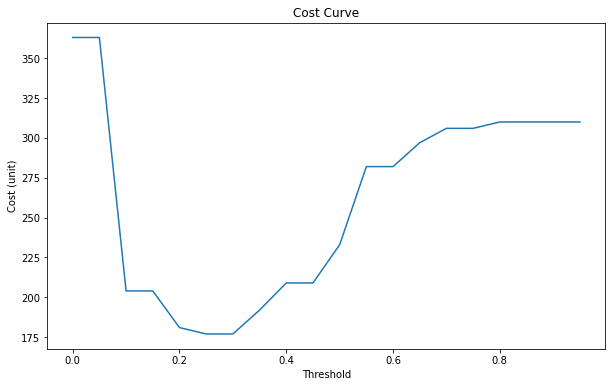

In [145]:
plot_cost_curve(costs)

In [148]:
# obtain the threshold which minimize the cost
cost = []
threshold = []

for p in costs:
    cost.append(p[0])
    threshold.append(p[1])
    
print(f"The minimum cost is achieved at threshold {threshold[np.argmin(cost)]}")

The minimum cost is achieved at threshold 0.25


- Optimal threshold is at 0.25, significantly lower than the normal practice of 0.5
- Result due to different costs of false positive error and false negative error